# A Cookbook of WBGAPI Recipes

[WBGAPI](https://pypi.org/project/wbgapi) is a python package for accessing the [World Bank's open data API](https://data.worldbank.org/developers). This notebook provides additional examples beyond the "Getting Started" information available at <https://pypi.org/project/wbgapi>.

In [22]:
import wbgapi as wb   # I use wb as a namespace in all my work
import pandas as pd   # optional but highly recommended for wbgapi
import matplotlib.pyplot as plt

%matplotlib inline

## Querying and Searching ##

The `info` functions are the primary tool for searching the API. You can limit the response by calling `info()` with identifiers (a single value or lists) or by adding a keyword search.

    wb.source.info() # especially useful for seeing what databases are available
    wb.series.info()
    wb.economy.info('CAN')
    wb.economy.info(['USA', 'MEX', 'ARG'])
    wb.series.info(q='co2')
    wb.economy.info(q='korea')

In [23]:
wb.series.info(q='co2')

id,value
EN.ATM.CO2E.EG.ZS,CO2 intensity (kg per kg of oil equivalent energy use)
EN.ATM.CO2E.GF.KT,CO2 emissions from gaseous fuel consumption (kt)
EN.ATM.CO2E.GF.ZS,CO2 emissions from gaseous fuel consumption (% of total)
EN.ATM.CO2E.KD.GD,CO2 emissions (kg per 2010 US$ of GDP)
EN.ATM.CO2E.KT,CO2 emissions (kt)
EN.ATM.CO2E.LF.KT,CO2 emissions from liquid fuel consumption (kt)
EN.ATM.CO2E.LF.ZS,CO2 emissions from liquid fuel consumption (% of total)
EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita)
EN.ATM.CO2E.PP.GD,CO2 emissions (kg per PPP $ of GDP)
EN.ATM.CO2E.PP.GD.KD,CO2 emissions (kg per 2017 PPP $ of GDP)


`wb.search(q, brief=False)` is the other option; it searches the metadata of the current database. The `brief` parameter produces a more concise but less informative report.

In [24]:
wb.search('pound')

ID,Name,Field,Value
CHI,Channel Islands,CurrencyUnit,Pound sterling
EGY,"Egypt, Arab Rep.",CurrencyUnit,Egyptian pound
GBR,United Kingdom,CurrencyUnit,Pound sterling
GIB,Gibraltar,CurrencyUnit,Gibraltar pound
IMN,Isle of Man,CurrencyUnit,Pound sterling
IRL,Ireland,SpecialNotes,"...rate was adopted by the EU Council on January 1, 1999: 1 euro = 0.787564 Irish pound. Please note that historical data before 1999 are not actual euros and are not..."
LBN,Lebanon,CurrencyUnit,Lebanese pound
SDN,Sudan,CurrencyUnit,Sudanese pound
SSD,South Sudan,CurrencyUnit,South Sudanese Pound
SYR,Syrian Arab Republic,CurrencyUnit,Syrian pound


**Note:** `wb.search` actually returns a print-friendly object that can easily be accessed in a for loop. The results of the `info` functions can be accessed by calling `list` or `Series` instead:

    for row in wb.series.info(q='co2'):
        print(row)

## Data queries ##

WBGAPI can work with or without pandas, but pandas is a lot more interesting! Single identifiers and lists of identifiers can be mixed and matched. Here is a basic data query that returns a single indicator for all available economies and 5 even years.

In [25]:
wb.data.DataFrame('SP.POP.TOTL', time=range(2010, 2020, 2), labels=True)

,Country,YR2010,YR2012,YR2014,YR2016,YR2018
economy,,,,,,
ZWE,Zimbabwe,1.269772e+07,1.311513e+07,1.358668e+07,1.403039e+07,1.443902e+07
ZMB,Zambia,1.360598e+07,1.446512e+07,1.539975e+07,1.636351e+07,1.735182e+07
YEM,"Yemen, Rep.",2.315486e+07,2.447318e+07,2.582348e+07,2.716821e+07,2.849869e+07
PSE,West Bank and Gaza,3.786161e+06,3.979998e+06,4.173398e+06,4.367088e+06,4.569087e+06
VIR,Virgin Islands (U.S.),1.083580e+05,1.081910e+05,1.078840e+05,1.075100e+05,1.069770e+05
...,...,...,...,...,...,...
EAS,East Asia & Pacific,2.206885e+09,2.236819e+09,2.267482e+09,2.298486e+09,2.328138e+09
EAR,Early-demographic dividend,2.907917e+09,2.994364e+09,3.079709e+09,3.164387e+09,3.248239e+09
CEB,Central Europe and the Baltics,1.044214e+08,1.039353e+08,1.034962e+08,1.029943e+08,1.025370e+08


## Charting and Plotting ##

Basic panda charts (using [matplotlib](https://pypi.org/project/matplotlib)) are straight forward. Of course, you can use any plotting package you like: [seaborn](https://pypi.org/project/seaborn), [plotly](https://pypi.org/project/plotly), etc. Here is a plot of per-capita income for 3 countries and 2 decades:

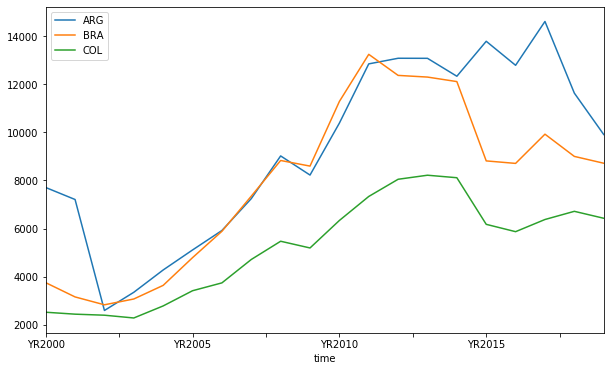

In [26]:
wb.data.DataFrame('NY.GDP.PCAP.CD', ['BRA', 'ARG', 'COL'],
                  range(2000, 2020), index='time').plot(figsize=(10, 6))
plt.show()

# A few "Stupid API Tricks" #

## What's the distribution of poverty estimates over time? ##

The `mrnev` parameter lets you return the most recent non-empty values. If this is set to 1 then WBGAPI typically does not include a time dimension in the data frame. You can specifically request this with the `columns` or `index` parameter, as well as request numeric values for the time dimension. In this case, this gives an interesting view of the time variation for poverty estimates (SI.POV.NAHC)

In [27]:
df = wb.data.DataFrame('SI.POV.NAHC', mrnev=1, columns='time', numericTimeKeys=True)
df

,1993,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
economy,,,,,,,,,,,,,,,
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.5,NaN,NaN,NaN
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.3,NaN
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.5
ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.6,NaN,NaN,NaN,NaN
YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.6,NaN,NaN,NaN,NaN,NaN
ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.5,NaN,NaN,NaN,NaN,NaN


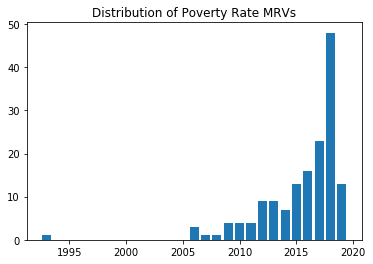

In [28]:
# Here's the same data frame plotted as a bar graph
counts = df.count()
plt.bar(counts.index, counts)
ax = plt.title('Distribution of Poverty Rate MRVs')

## Do indicators vary across different versions of the WDI? ##

Most databases in the API have 3 dimensions: series, country (or economy) and time. But some have 4 dimensions.
The WDI database (db=57) includes a `version` dimension that lets you fetch indicators from previous vintages. Here
is how you can explore non-standard dimensions:

In [29]:
wb.source.concepts(db=57)

{'economy': {'key': 'country', 'value': 'Country'},
 'series': {'key': 'series', 'value': 'Series'},
 'time': {'key': 'time', 'value': 'Time'},
 'version': {'key': 'version', 'value': 'Version'}}

In [30]:
wb.Series(wb.source.features('version', db=57))

198904    1989 Apr
199004    1990 Apr
199009    1990 Sep
199104    1991 Apr
199109    1991 Sep
            ...   
202005    2020 May
202007    2020 Jul
202008    2020 Aug
202009    2020 Sep
202010    2020 Oct
Name: value, Length: 104, dtype: object

You can pass non-standard dimensions as parameters to `wb.data.fetch` `wb.data.get` and `wb.data.DataFrame`.
In this example, the version parameter specifies the year and month of the WDI revision. Requesting versions
on intervals of 100 thus gives you the April release of every year in the requested range.
You can compare values across different database versions to see if they've changed.

In [31]:
df = wb.data.DataFrame('SP.POP.TOTL', 'BRA', db=57, time=range(2000, 2020),
                       version=range(201004, 202004, 100), index='time')
df

,201004,201104,201204,201304,201404,201504,201604,201704,201804,201904
time,,,,,,,,,,
YR2000,174174447.0,174174447.0,174425387.0,174425387.0,174504898.0,174504898.0,175786441.0,175786441.0,175287587.0,175287587.0
YR2001,176659138.0,176659138.0,176877135.0,176877135.0,176968205.0,176968205.0,178419396.0,178419396.0,177750670.0,177750670.0
YR2002,179123364.0,179123364.0,179289227.0,179289227.0,179393768.0,179393768.0,181045592.0,181045592.0,180151021.0,180151021.0
YR2003,181537359.0,181537359.0,181633074.0,181633074.0,181752951.0,181752951.0,183627339.0,183627339.0,182482149.0,182482149.0
YR2004,183863524.0,183863524.0,183873377.0,183873377.0,184010283.0,184010283.0,186116363.0,186116363.0,184738458.0,184738458.0
YR2005,186074634.0,186074634.0,185986964.0,185986964.0,186142403.0,186142403.0,188479240.0,188479240.0,186917361.0,186917361.0
YR2006,188158438.0,188158438.0,187958211.0,187958211.0,188134315.0,188134315.0,190698241.0,190698241.0,189012412.0,189012412.0
YR2007,190119995.0,190119995.0,189798070.0,189798070.0,189996976.0,189996976.0,192784521.0,192784521.0,191026637.0,191026637.0
YR2008,191971506.0,191971506.0,191543237.0,191543237.0,191765567.0,191765567.0,194769696.0,194769696.0,192979029.0,192979029.0


Again, the same data frame plotted for ease of understanding:

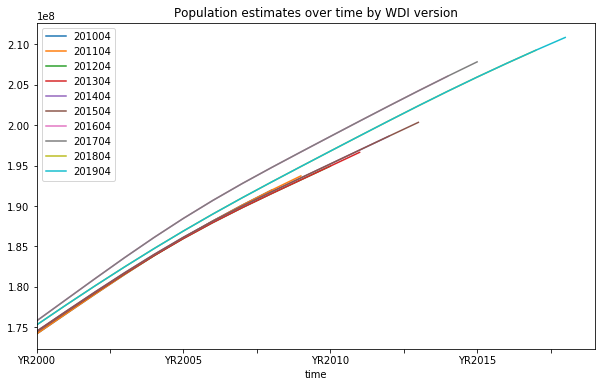

In [32]:
ax = df.plot(figsize=(10, 6), title="Population estimates over time by WDI version")

## Aggregations

Aggregations are easy in pandas. You simply use a summary function, something like this:

       df.mean()

For this demonstration let's start by getting a small sample of data to aggregate

In [33]:
df = wb.data.DataFrame('EG.ELC.ACCS.ZS', ['BRA', 'COL', 'PER'], time=range(1990,1996))
df

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995
economy,,,,,,
BRA,87.475116,90.104225,88.803833,89.999927,91.526451,91.728598
COL,89.900000,90.984200,91.304237,91.624878,91.946709,91.200000
PER,NaN,NaN,70.100000,64.809532,66.096573,67.385399


Now let's calculate **unweighted** averages for each year:

In [34]:
df.mean()

YR1990    88.687558
YR1991    90.544212
YR1992    83.402690
YR1993    82.144779
YR1994    83.189911
YR1995    83.437999
dtype: float64

What about **weighted** averages? Here, we need data for the weights,
such as population, for each of values we're weighting. That means we need a data frame of population values with the same dimensions as the values we are weighting. There are a few ways to do this, but the most straight-forward is to fetch both indicators for the same set of economies and time periods in a single data frame. In this case, WBGAPI will create the dataframe with a multi-index, which you can (optionally) configure with the `index` parameter:

In [35]:
combined = wb.data.DataFrame(['EG.ELC.ACCS.ZS', 'SP.POP.TOTL'], ['BRA', 'COL', 'PER'],
                             time=range(1990,1996), index=['series', 'economy'])
combined

YR1990        YR1991        YR1992  \
series         economy                                             
EG.ELC.ACCS.ZS BRA      8.747512e+01  9.010423e+01  8.880383e+01   
               COL      8.990000e+01  9.098420e+01  9.130424e+01   
               PER               NaN           NaN  7.010000e+01   
SP.POP.TOTL    BRA      1.490032e+08  1.516480e+08  1.542594e+08   
               COL      3.310257e+07  3.375833e+07  3.442257e+07   
               PER      2.207143e+07  2.252238e+07  2.296682e+07   

                              YR1993        YR1994        YR1995  
series         economy                                            
EG.ELC.ACCS.ZS BRA      8.999993e+01  9.152645e+01  9.172860e+01  
               COL      9.162488e+01  9.194671e+01  9.120000e+01  
               PER      6.480953e+01  6.609657e+01  6.738540e+01  
SP.POP.TOTL    BRA      1.568491e+08  1.594327e+08  1.620199e+08  
               COL      3.509127e+07  3.575898e+07  3.642144e+07  
               PER      2.340813e+07  2.385141e+07  2.429916e+07

Then (and very importantly) you must mask out the values in the weight variable that don't appear in the aggregated variable. If you don't then the denominator in the weighted average calculation will be wrong. Fortunately, pandas makes this easy:

In [36]:
elec_access = combined.xs('EG.ELC.ACCS.ZS')    # data frame for just a single variable
combined = combined[elec_access.isna()==False] # mask out NaN values in other variables
combined

YR1990        YR1991        YR1992  \
series         economy                                             
EG.ELC.ACCS.ZS BRA      8.747512e+01  9.010423e+01  8.880383e+01   
               COL      8.990000e+01  9.098420e+01  9.130424e+01   
               PER               NaN           NaN  7.010000e+01   
SP.POP.TOTL    BRA      1.490032e+08  1.516480e+08  1.542594e+08   
               COL      3.310257e+07  3.375833e+07  3.442257e+07   
               PER               NaN           NaN  2.296682e+07   

                              YR1993        YR1994        YR1995  
series         economy                                            
EG.ELC.ACCS.ZS BRA      8.999993e+01  9.152645e+01  9.172860e+01  
               COL      9.162488e+01  9.194671e+01  9.120000e+01  
               PER      6.480953e+01  6.609657e+01  6.738540e+01  
SP.POP.TOTL    BRA      1.568491e+08  1.594327e+08  1.620199e+08  
               COL      3.509127e+07  3.575898e+07  3.642144e+07  
               PER      2.340813e+07  2.385141e+07  2.429916e+07

This makes it easy to calculate weighted averages, i.e. the sum of the weighted values divided by the sum of the weights:


In [37]:
elec_access = combined.xs('EG.ELC.ACCS.ZS')
pop = combined.xs('SP.POP.TOTL')
(elec_access*pop).sum() / pop.sum()

YR1990    87.915903
YR1991    90.264449
YR1992    87.180874
YR1993    87.526548
YR1994    88.826022
YR1995    88.986521
dtype: float64

## Group Aggregations ##

Group aggregations are just an extension of the above approach. You simply need to join
the indicator data frames on the variable that defines your groups before calculating the
averages. Here, let's define a toy grouping based on the first letter of the country name. As a first step, we need to create a pandas series of country first initials.

In [38]:
c = wb.economy.DataFrame()
c['Initial'] = c['name'].str[0]
initial = c['Initial']

# another way to the same thing
initial = wb.economy.Series(name='Initial').apply(lambda n: n[0])

initial

ABW    A
AFG    A
AGO    A
ALB    A
AND    A
      ..
XKX    K
YEM    Y
ZAF    S
ZMB    Z
ZWE    Z
Name: Initial, Length: 264, dtype: object

The technique for calculating a weighted average is just a variation on the previous approach:

In [39]:
# This time we'll pull all countries, not just 3. Be sure to exclude aggregate regions
# like World or Sub-Saharan Africa
combined = wb.data.DataFrame(['EG.ELC.ACCS.ZS', 'SP.POP.TOTL'], skipAggs=True,
                             time=range(1990,1996), index=['series', 'economy'])
elec_access = combined.xs('EG.ELC.ACCS.ZS')

# mask out observations in the weight variable that are missing from the aggregated variable
combined[elec_access.isna()==False]

pop = combined.xs('SP.POP.TOTL')

numerator   = (elec_access * pop).join(initial).groupby('Initial').sum()
denominator = pop.join(initial).groupby('Initial').sum()

numerator / denominator

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995
Initial,,,,,,
A,20.394088,20.182581,19.940850,19.656831,19.390261,19.176935
B,50.978663,56.821452,56.607213,58.107254,59.862221,60.474628
C,7.224544,7.548083,7.610147,7.659418,7.902761,7.978266
D,39.743639,82.734086,84.823144,85.237356,85.656895,86.068605
E,1.259442,4.126377,45.989527,46.627169,46.479356,53.765483
F,98.865114,98.860891,98.852751,98.841816,98.830081,98.819548
G,69.895021,69.530182,69.162506,73.017918,72.893535,77.515227
H,57.276486,66.608368,67.027340,67.166208,67.628825,75.768485
I,5.463569,12.804881,15.339367,50.979664,50.541511,52.365148
